# **Street View Housing Number Digit Recognition: Prediction Models via Deep Learning Algorithms**


##**Problem Definition**

### **The Context - Why Digit Recognition?**

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms (**computer vision**) can be very useful as demonstrated in various applications.

The Street View Housing Number (SVHN) dataset contains over **600,000 labeled digits cropped from street-level photos**. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

<br>

### **The Objective - Artificial vs. Convolutional Neural Networks**

This project is designed to **predict the number** depicted inside the image by using **Artificial (Fully Connected Feed Forward)** Neural Networks and **Convolutional** Neural Networks. Various models of each type are evaluated, with a final model chosen based upon best performance.

<br>

###**Key Questions**
* Which type of neural network performs better, Artificial Neural Networks (ANNs) or Convolutional Neural Networks (CNNs)?

##**Key Findings and Business Recommendation**

###**Key Findings**
* ANN Models returned **lower accuracy metrics**, but were observed to be **less prone to overfitting** the training data than CNN Models.
* ANN variations acheived an overall F1-score of **76%**, whereas CNNs acheived an overall F1-score of **91%**.  Despite the issue of overfitting, CNNs are significantly more accurate in predicting SVHNs from the image dataset.
* In both ANN and CNN models, the numbers **3 and 5** were the **most commonly mispredicted numbers**.

<br>

###**Business Recommendations**
* Comparing the performance of both ANN and CNN models, **CNN Model 2 is the recommended model** for SVHN prediction due to the higher accuracy and sensitivity metrics obtained from the test data.
* Further parameter optimization may be conducted to determine if the model can be improved to **increase the precision and recall** of numbers 3 and 5 (e.g. change filter size) if business needs require it.

##**Data Set Description**

A subset of the original dataset (SHVN dataset) is used to save on computation time.  The subset was provided as a .h5 file for the project.  The basic preprocessing steps have been applied to the dataset (checking for null values, duplicates)

### **Mount Google Drive and Import Libraries**

In [ ]:
from google.colab import drive    # code to import google drive from google.colab
drive.mount('/content/drive')     # run 'drive.mount' and provide specific file location as necessary

Mounted at /content/drive


In [ ]:
import numpy as np    # allows use of arrays and other mathematical functions required in NN models
import pandas as pd   # allows use of data frames and manipulation of data needed for data preprocessing (e.g. drop null values, convert data types, etc)

import matplotlib.pyplot as plt   # needed for data visualization during exploratory data analysis
import seaborn as sns             # needed for more sophisticated data visualization (e.g. histograms/boxplots)

from sklearn.model_selection import train_test_split    # required to split data into train and test sets for model development and testing
from sklearn.preprocessing import MinMaxScaler          # required in data preprocessing to bring data values within the same scale (0 - 1)

import tensorflow as tf     # package used to train large-scale neural networks
from tensorflow.keras.models import Sequential    # import Sequential model from tf.keras; used for feed forward NNs
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization    # import layers for NN model (specific comments in further code)
from tensorflow.keras.losses import categorical_crossentropy    # import loss function to measure error in NN model
from tensorflow.keras.optimizers import Adam    # import optimization algorithm used to train the NN model
from tensorflow.keras.utils import to_categorical   # import module that converts categorical data into one-hot encoded vectors


In [ ]:
# check version of tensorflow, update as needed
print(tf.__version__)   # prints version of loaded tf package

2.13.0


###**Data Pre-processing**

#### **Load and Split dataset (Train/Test)**

In [ ]:
import h5py   # import library that can open HDF5 ('.h5') files

h5f = h5py.File('/content/drive/MyDrive/ADSP_Week8_DeepLearningProject/SVHN_single_grey1.h5', 'r')    # open raw data file as 'read only'

In [ ]:
# understand what datasets are within the .h5 file by listing names ('keys') of the data sets:
keys = list(h5f.keys())
print(keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [ ]:
# access train and test datasets from the .h5 file and create new Py variables for future use
X_train = h5f['X_train'][:]     # create new variable 'X_train' by slicing all 'X_train' dataset from the raw data .h5 file
y_train = h5f['y_train'][:]     # repeat code for 'y_train' variable

X_test = h5f['X_test'][:]       # repeat code for 'X_test' variable
y_test = h5f['y_test'][:]       # repeat code for 'y_test' variable

# note that 'X' is capitalized and 'y' is not, code will run error if syntax is incorrect

In [ ]:
# confirm new variables are multidimensional arrays
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# close .h5 file
h5f.close()

In [ ]:
# confirm appropriate split ratio for train/test data sets

# use 'len()' function to count total number of values or 'images' in the dataset:
len(X_train), len(X_test)

(42000, 18000)

###**Observations:**
> * There are 42,000 images in the training dataset, and 18,000 images in the testing dataset.  This **70/30 split** between training and testing data is appropriate for developing and testing the Neural Network models.

#### **Visualizing dataset**

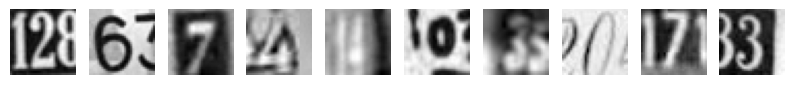

In [ ]:
# create parent figure to visualize images from the 'X_train' dataset:
plt.figure(figsize = (10, 1))   # creates figure with 10' width and 1' height

# create for loop to open the first 10 images individually and add them to the parent figure:
for i in range(10):             # 'range(10)' specifies elements 0-9 in the 'X_train' dataset
    plt.subplot(1, 10, i+1)     # creates subplot with 1 row and 10 columns, indexed from 1-10 (i+1)
    plt.imshow(X_train[i],      # use 'plt.imshow()' to show images sliced at element 'i' in the 'X_train' dataset
               cmap = 'gray')   # format images in grayscale
    plt.axis('off')     # turn off axis label

plt.show()    # code to show the final image in notebook

In [ ]:
# print labels for 'X_train' dataset images via 'y_train' dataset:
print('Labels for first 10 images in X_train dataset:', (y_train[0:10]))

Labels for first 10 images in X_train dataset: [2 6 7 4 4 0 3 0 7 3]


#### **Determine shape and pixel values for image array(s)**

In [ ]:
# slice first image from the 'X_train' dataset and determing shape:
X_train[0].shape

# create print statement:
print('The shape of the first image in the X_train dataset is:', X_train[0].shape)

The shape of the first image in the X_train dataset is: (32, 32)


In [ ]:
# call the array of pixels for the first image:
X_train[0]

# create print statement:
print('The array of pixel values for the first image is:', X_train[0])

The array of pixel values for the first image is: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# reshape dataset to match input requirements in ANN model architecture defined below:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

#### **Normalize pixel values for train/test data**

In [ ]:
# replace variable and normalize train and test data by dividing arrays by 225
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# confirm reshape for input arrays
print('The shape of the Training data is:', X_train.shape, y_train.shape)
print('The shape of the Testing data is:', X_test.shape, y_test.shape)

The shape of the Training data is: (42000, 1024) (42000,)
The shape of the Testing data is: (18000, 1024) (18000,)


#### **One-hot encode categorical labels**

In [ ]:
# replace 'y_train'/'y_test' variable with one-hot encoded categorical output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# confirm one-hot encoding:
print(y_train[0])
print(y_train[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# check shape of 'y_train' array, now has 10 new columns in array from one-hot encoding
y_train.shape

(42000, 10)

###**Observations:**
> * The **shape of the first image** in the 'X_train' dataset is **32 x 32**.
* The values in the first array of pixels in the 'X_train' dataset range from 0-255.
* The values for pixels in each image of the 'X_train' and 'X_test' datasets were normalized to a **range of 0-1** by dividing the datasets by 255 (max pixel value).
* Performed **one-hot encoding** on the 'y_train' and 'y_test' datasets added **10 new columns** to the shape of the datasets, which represent a vector associated with **categorical** value.


## **Artificial Neural Network(s)**


####**Set seed number**

In [ ]:
tf.random.set_seed(12)  # define seed number for tf functions

###**ANN Model 1 - Sequential class, 3 layers**

#### **Model Architecture**
Define ANN model function with **Sequential class** and the following architecture:
 - First hidden layer with **64 nodes** and the **relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes** and the **relu activation**
 - Output layer with **softmax activation** and **10 nodes** (number of classifications, 0-9)

 <br>

Compile the model using:
* loss function as **categorical_crossentropy**
* optimizer equal to **Adam(learning_rate = 0.001)**
* metric equal to **'accuracy'**.

<br>

Fit model on the training data set using:
* validation split of **0.2**
* batch size of **128**
* verbose = **1**
* epochs = **20**

#### **Build and train ANN Model 1**

In [ ]:
# Step 1: define model function with given architecture above
def nn_model_1():     # create 'nn_model_1' function variable
    model = Sequential()    # create 'model' variable defined by Sequential class in tf.keras.models package

    # build model layers:
    model.add(Dense(64,                       # add input layer using Dense layer type with 64 output nodes
                    activation = 'relu',      # use ReLU type activation function (output 0-infinity)
                    input_shape = (1024,)))   # define number of input nodes from dataset as 1024

    model.add(Dense(32,                       # add second layer of Dense type with 32 output nodes
                    activation = 'relu'))     # use ReLU activation function

    model.add(Dense(10,                       # add output layer of Dense type with 10 output nodes (10 different classifications of 0-9)
                    activation = 'softmax'))  # use Softmax output to convert output vector into probability distribution

    # compile model:

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),    # define Adam optimizer with learning_rate = 0.001
                  loss = 'categorical_crossentropy',                                # define loss function as 'categorical crossentropy'
                  metrics = ['accuracy'])                                           # define list of metrics to include 'accuracy'
    return model    # returns 'model' variable

In [ ]:
# Step 2: Build the model using the previously defined function
model_1 = nn_model_1()

In [ ]:
# Step 3: Print model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Step 4: Fit the model
history_model_1 = model_1.fit(x = X_train,              # define input data as 'X_train' (features)
                              y = y_train,              # define target data as 'y_train' (labels)
                              batch_size = 128,         # define batch size as 20 (number of samples in a mini training batch)
                              epochs = 20,              # define epochs (number of times data is passed through the network)
                              verbose = 1,              # define verbosity mode as progress bar
                              validation_split = 0.2)   # define fraction of training data used as validation data

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2957 - accuracy: 0.1187 - val_loss: 2.2498 - val_accuracy: 0.1676
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0408 - accuracy: 0.2623 - val_loss: 1.8041 - val_accuracy: 0.4023
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.6728 - accuracy: 0.4383 - val_loss: 1.5276 - val_accuracy: 0.5083
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4648 - accuracy: 0.5293 - val_loss: 1.3964 - val_accuracy: 0.5504
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 1.3609 - accuracy: 0.5652 - val_loss: 1.3193 - val_accuracy: 0.5852
Epoch 6/20
263/263 [==============================] - 2s 8ms/step - loss: 1.2942 - accuracy: 0.5912 - val_loss: 1.2650 - val_accuracy: 0.6026
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2592 - accuracy: 0.6014 - val_loss: 1.2528 - val_accuracy: 0.6005
Epoch 

#### **Plot accuracy metrics**

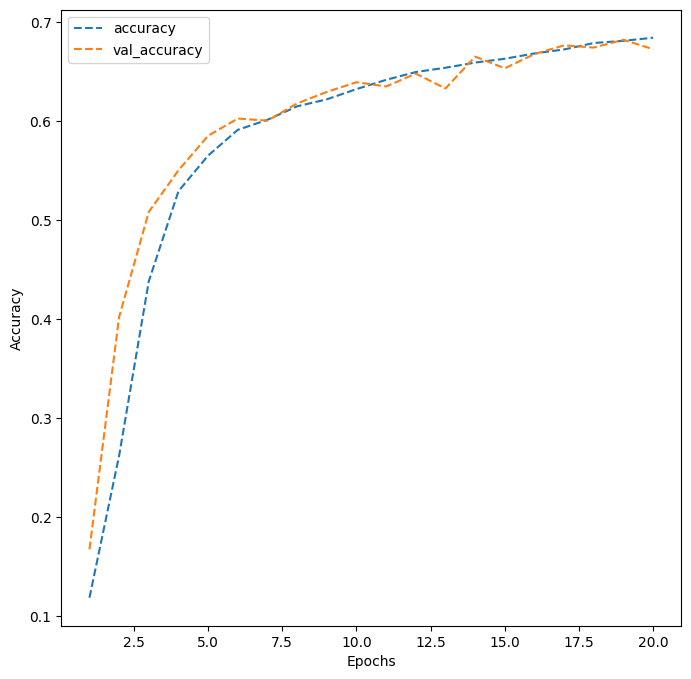

In [ ]:
# create dictionary of data from 'history_model_1' variable
dict_hist = history_model_1.history

# create list of epochs
epoch_list = [i for i in range(1, 21)]    # use for loop to generate list of number 1-20

# create plot figure
plt.figure(figsize = (8,8))   # define figure size

plt.plot(epoch_list,              # define plot feature with x-axis as 'epoch_list'
         dict_hist['accuracy'],   # define y-axis as values from 'accuracy' key in dict_hist
         ls = '--',               # format line style as dashed
         label = 'accuracy')      # define plot feature label

plt.plot(epoch_list,                 # define x-axis as 'epoch_list'
          dict_hist['val_accuracy'],  # define y-axis as values from 'val_accuracy' key in dict_hist
          ls = '--',                  # format line style as dashed
          label = 'val_accuracy')     # define feature label

plt.xlabel('Epochs')    # format x-axis plot label
plt.ylabel('Accuracy')  # format y-axis plot label

plt.legend()    # add plot feature legend
plt.show()      # show plot in notebook


###**ANN Model 2 - Sequential class, 8 layers**

####**Clear backend and set seed**

In [ ]:
# clear backend to free up resources and ensure that new model starts 'fresh' without interference from previous model
from tensorflow.keras import backend    # code to import backend package
backend.clear_session()                 # code to clear session info to free up memory/resources

In [ ]:
# fix seed again for random number generator using previous seed number
tf.random.set_seed(12)

#### **Model Architecture**
Define ANN model function with **Sequential class** and the following architecture:
 - First hidden layer with **256 nodes** and the **relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes** and the **relu activation**
 - Add **Dropout layer** with the rate equal to **0.2**
 - Third hidden layer with **64 nodes** and the **relu activation**
 - Fourth hidden layer with **64 nodes** and the **relu activation**
 - Fifth hidden layer with **32 nodes** and the **relu activation**
 - Add **BatchNormalization layer**
 - Output layer with **softmax activation** and **10 nodes**

 <br>

Compile the model using:
* loss function as **categorical_crossentropy**
* optimizer equal to **Adam(learning_rate = 0.0005)**
* metric equal to **'accuracy'**.

<br>

Fit model on the training data set using:
* validation split of **0.2**
* batch size = **128**
* verbose = **1**
* epochs = **30**

#### **Build and train ANN Model 2**

In [ ]:
# Step 1: define model function with given architecture for 2nd model
def nn_model_2():           # create 'nn_model_2' function variable
    model = Sequential()    # define model as Sequential type

    # build model layers as defined above
    model.add(Dense(256, activation = 'relu', input_shape = (1024,)))     # same as 1st model, except now have 256 output nodes instead of 64
    model.add(Dense(128, activation = 'relu'))                            # second Dense layer with 128 output nodes
    model.add(Dropout(rate = 0.2))              # add Dropout type layer with rate = 0.2 to random remove outputs (20% will be randomly set to zero)
    model.add(Dense(64, activation = 'relu'))         # third Dense layer with 64 output nodes
    model.add(Dense(64, activation = 'relu'))         # fourth Dense layer with 64 output nodes (back to back Dense layers with same number of output nodes can make the model more stable)
    model.add(Dense(32, activation = 'relu'))         # fifth Dense layer with 32 output nodes
    model.add(BatchNormalization())             # add BatchNormalization layer to improve model stability and reduce model training time
    model.add(Dense(10, activation = 'softmax'))      # final output layer with 10 classifications and values converted to probability

    # compile model
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),     # update Adam learning rate to 0.0005 instead of 0.001
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
# Step 2: build the model
model_2 = nn_model_2()

In [ ]:
# Step 3: Print model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
# Step 4: Fit the model
history_model_2 = model_2.fit(x = X_train,            # define 'feature' dataset
                              y = y_train,            # define 'label' dataset
                              batch_size = 128,       # define batch size
                              epochs = 30,            # update number of epochs to 30
                              verbose = 1,            # define verbosity as progress bar
                              validation_split = 0.2) # keep 20% validation split

Epoch 1/30
263/263 [==============================] - 5s 12ms/step - loss: 2.3373 - accuracy: 0.1070 - val_loss: 2.3030 - val_accuracy: 0.1206
Epoch 2/30
263/263 [==============================] - 3s 11ms/step - loss: 2.2588 - accuracy: 0.1401 - val_loss: 2.1751 - val_accuracy: 0.1698
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 1.9491 - accuracy: 0.2731 - val_loss: 1.7230 - val_accuracy: 0.3799
Epoch 4/30
263/263 [==============================] - 4s 16ms/step - loss: 1.5342 - accuracy: 0.4681 - val_loss: 1.5019 - val_accuracy: 0.4719
Epoch 5/30
263/263 [==============================] - 3s 13ms/step - loss: 1.3451 - accuracy: 0.5443 - val_loss: 1.2360 - val_accuracy: 0.5886
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.2314 - accuracy: 0.5920 - val_loss: 1.1518 - val_accuracy: 0.6276
Epoch 7/30
263/263 [==============================] - 3s 11ms/step - loss: 1.1699 - accuracy: 0.6145 - val_loss: 1.1402 - val_accuracy: 0.6281

#### **Plot accuracy metrics**

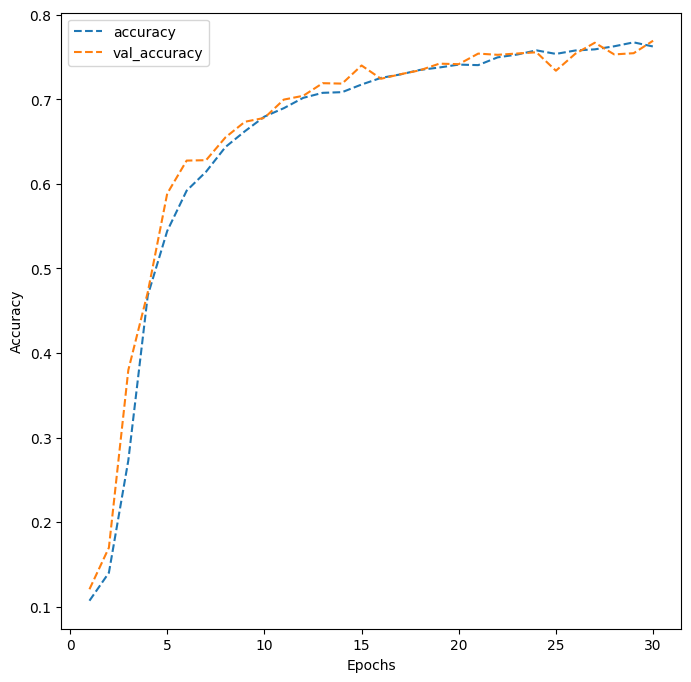

In [ ]:
# plot training and validation accuracies

# create dictionary of data from 'history_model_2' variable
dict_hist_2 = history_model_2.history

# create list of epochs
epoch_list_2 = [i for i in range(1, 31)]    # use for loop to generate list of number 1-30

# create plot figure
plt.figure(figsize = (8,8))   # define figure size

plt.plot(epoch_list_2,              # define plot feature with x-axis as 'epoch_list_2'
         dict_hist_2['accuracy'],   # define y-axis as values from 'accuracy' key in dict_hist_2
         ls = '--',                 # format line style as dashed
         label = 'accuracy')        # define plot feature label

plt.plot(epoch_list_2,                  # define x-axis as 'epoch_list_2'
          dict_hist_2['val_accuracy'],  # define y-axis as values from 'val_accuracy' key in dict_hist_2
          ls = '--',                    # format line style as dashed
          label = 'val_accuracy')       # define feature label

plt.xlabel('Epochs')    # format x-axis plot label
plt.ylabel('Accuracy')  # format y-axis plot label

plt.legend()    # add plot feature legend
plt.show()      # show plot in notebook

###**Observations:**
* The final accuracy of ANN Model 1 is **~68%**.
* The final accuracy of ANN Model 2 is **~77%**, a 10% increase in accuracy from ANN Model 1.
* ANN Model 2 surpassed the accuracy of ANN Model 1 within the first 10 epochs, suggesting that **ANN Model 2 converges quicker than ANN Model 1**.

### **ANN Model 2 - Predictions on Test Dataset**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

####**Generate test data predictions**

In [ ]:
# make predictions on test dataset using previously trained model_2
test_pred = model_2.predict(X_test)   # generate np.array of prediction values using 'X_test' as input data into the model

# use 'np.argmax()' function to return array of indicies associated with the maximum value in the original test_pred array
# this converts the one-hot encoded vector prediction into classification category 0-9
test_pred = np.argmax(test_pred,      # define data array
                      axis = -1)

563/563 [==============================] - 3s 4ms/step


In [ ]:
# convert each predicted data value in 'y_test' values from one-hot encoded vector to single label for classification report and confusion matrix
y_test = np.argmax(y_test, axis = -1)

#### **Print classification report and confusion matrix**

In [ ]:
# import classification and confusion matrix functions from scikit-learn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# create classification report variable 'cr'
cr_1 = classification_report(y_test,      # define 'true' y-values
                           test_pred)   # define 'predicted' y-values

In [ ]:
# print classification report
print(cr_1)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1814
           1       0.82      0.76      0.79      1828
           2       0.90      0.72      0.80      1803
           3       0.72      0.70      0.71      1719
           4       0.80      0.81      0.81      1812
           5       0.67      0.76      0.71      1768
           6       0.72      0.81      0.76      1832
           7       0.87      0.77      0.82      1808
           8       0.72      0.70      0.71      1812
           9       0.70      0.75      0.72      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.76     18000
weighted avg       0.77      0.76      0.76     18000



In [ ]:
# create confusion matrix
cm_1 = confusion_matrix(y_test, test_pred)

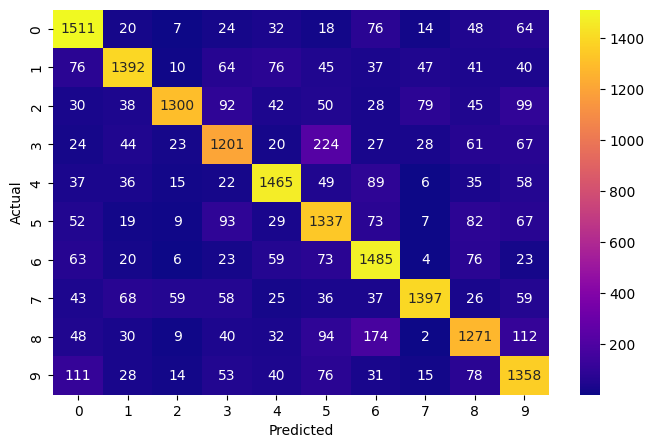

In [ ]:
# plot heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(cm_1,
            annot = True,
            fmt = '.0f',
            cmap = 'plasma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###**Final Observations:**

**Classification Report**
* In the Support column, it's observed that the distribution of images is relatively even among classifications, therefore **no observed bias** between performance metrics and dataset due to skewed distribution of images.

* In terms of Precision (model accuracy), the number 5 has the lowest accuracy, meaning that only **~67% of the time the model predicted an 5, the image actually was an 5**.  The **number 2 had the highest precision at ~90%**; a higher precision indicates a lower number of false positive predictions by the model.  The model might have been predicting 5 when it could have been a different number due to the font or shape of number in the images.

* In terms of Recall (model sensitivity), the **number 0 had the highest recall at ~83%**, and the **numbers 3 and 8 had the lowest sensitivity at ~70%**.  Comparing the precision and recall for the number 5, it's observed that when the model identified an image as the number 5, it was correct ~67% of the time, but for all the images of the number 5 in the dataset, the model correctly identified ~76% of them.  This can be interpreted as such: the** model is over-predicting the number 5** and has some **tendency to false positive identification of number 5**.

* In terms of F1-score (overall model performance), **classification of number 7 had the best metrics overall at ~82%**, whereas **classification of numbers 3, 5, and 8 had the lowest performance at ~71%**.  The total accuracy of the model is ~77% for all classifications.

<br>

**Confusion Matrix**
* The **most commonly missed predictions by the model were for numbers 5 and 6**.  The were mistaken for numbers 3 and 8 respectively.  This is possibly due to the curved nature of the numbers, as the bottom half of each pair is similar.

## **Convolutional Neural Network(s)**

#### **Reload and Split raw dataset (Train/Test)**

In [ ]:
# reload raw dataset from .h5 file
h5f = h5py.File('/content/drive/MyDrive/ADSP_Week8_DeepLearningProject/SVHN_single_grey1.h5', 'r')

# redefine train and test data from .h5 file
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]

y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]

# close .h5 file
h5f.close()

In [ ]:
# confirm number of images in train and test datasets
len(X_train), len(X_test)

(42000, 18000)

### **Data Pre-processing**

#### **Determine shape and pixel values for image array(s)**

In [ ]:
# print shape of first image in training dataset
print('The shape of the first image is:', X_train[0].shape)

The shape of the first image is: (32, 32)


In [ ]:
# print the array of pixels from first image in training dataset
print('The array of pixels in the first image is:', X_train[0])

The array of pixels in the first image is: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# confirm shape of X_train dataset to find out how many 32 x 32 arrays exist in dataset
X_train.shape

(42000, 32, 32)

####**Reshape dataset for CNN architecture (4D array)**

In [ ]:
# reshape dataset to 4D array
X_train = X_train.reshape(X_train.shape[0],   # use 'X_train.shape[0]' to slice first element and return 42000 for batch size
                          32,                 # image height
                          32,                 # iamge width
                          1)                  # channel for grayscale images

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

#### **Normalize pixel values for train/test data**

In [ ]:
# divide datasets by 255 to normalize
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# run print statements to confirm 4D shape of datasets
print('The shape of the training datasets are:', X_train.shape, y_train.shape)
print('The shape of the test datasets are:', X_test.shape, y_test.shape)

The shape of the training datasets are: (42000, 32, 32, 1) (42000,)
The shape of the test datasets are: (18000, 32, 32, 1) (18000,)


#### **One-hot encode categorical labels**

In [ ]:
# one-hot encode y-variable data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# confirm one-hot encoding:
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


###**Observations:**
* Data preprocessing techniques are similar between ANNs and CNNs, but a key distinction is that **CNN require a 4D array input data structure.**


### **CNN Model 1 - Sequential class, 9 layers**

####**Set seed**

In [ ]:
# fix seed with same number as previous models
tf.random.set_seed(12)

#### **Model Architecture**
Define CNN model function with Sequential class using the following  architecture:
 - First Convolutional layer with **16 filters** and the kernel size of **3x3**. Use the **'same'** padding and provide the **input shape = (32, 32, 1)**
 - LeakyReLU layer with the slope equal to **0.1**
 - Second Convolutional layer with **32 filters** and the kernel size of **3x3** with **'same'** padding
 - LeakyReLU layers with the slope equal to **0.1**
 - MaxPooling layer with a pool size of **2x2**
 - **Flatten** the output from the previous layer
 - Dense layer with **32 nodes**
 - LeakyReLU layer with the slope equal to **0.1**
 - Output layer with **softmax activation** and **10 nodes** (equal to the number of classifications)

 <br>

Compile the model using:
* loss function as **categorical_crossentropy**
* optimizer equal to **Adam(learning_rate = 0.001)**
* metric equal to **'accuracy'**

<br>

Fit the model on training data set using:
* validation split = **0.2**
* batch size = **32**
* verbose = **1**
* epochs = **20**

####**Import CNN-specific libraries**

In [ ]:
# import additional packages/libraries for CNNs layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LeakyReLU

#### **Build and train CNN Model 1**

In [ ]:
# Step 1: define CNN model function with given architecture
def cnn_model_1():
    model = Sequential()

    # add model layers
    model.add(Conv2D(filters = 16,                # add first convolution layer with 16 filters/output channels
                     kernel_size = (3, 3),        # define size of filter receptive field
                     padding = 'same',            # 'zero-padding' to keep spatial dimensions consistent
                     input_shape = (32, 32, 1)))  # shape of input dataset

    model.add(LeakyReLU(alpha = 0.1))             # add LeakyReLU activation layer with slope = 0.1 to allow small amount of negative values pass
                                                  # useful to introduce non-linearity and mitigate vanishing gradient problem

    model.add(Conv2D(filters = 32,                # add second convolutional layer with 32 filters
                     kernel_size = (3, 3),
                     padding = 'same'))

    model.add(LeakyReLU(alpha = 0.1))             # add another LeakyReLU layer activation layer

    model.add(MaxPooling2D(pool_size = (2, 2)))   # add max pooling layer with size 2 x 2 to downsize data and focus on most important features

    model.add(Flatten())        # add Flatten layer to flatten vectors for fully connected layer types (e.g. Dense)

    model.add(Dense(32))        # add Dense layer with 32 output nodes

    model.add(LeakyReLU(alpha = 0.1))     # add LeakyReLU activation layer

    model.add(Dense(10, activation = 'softmax'))      # add final output layer with 10 classification nodes and values converted to probability

    # compile the model
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
# Step 2: build the model
cnn_model_1 = cnn_model_1()

In [ ]:
# Step 3: print the model summary
cnn_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Step 4: Fit the model
history_cnn_model_1 = cnn_model_1.fit(x = X_train,
                                      y = y_train,
                                      batch_size = 32,
                                      epochs = 20,
                                      verbose = 1,
                                      validation_split = 0.2)

Epoch 1/20
1050/1050 [==============================] - 75s 68ms/step - loss: 1.1528 - accuracy: 0.6204 - val_loss: 0.6267 - val_accuracy: 0.8238
Epoch 2/20
1050/1050 [==============================] - 73s 70ms/step - loss: 0.5471 - accuracy: 0.8416 - val_loss: 0.5343 - val_accuracy: 0.8508
Epoch 3/20
1050/1050 [==============================] - 74s 70ms/step - loss: 0.4587 - accuracy: 0.8668 - val_loss: 0.5123 - val_accuracy: 0.8582
Epoch 4/20
1050/1050 [==============================] - 73s 70ms/step - loss: 0.3974 - accuracy: 0.8838 - val_loss: 0.4726 - val_accuracy: 0.8662
Epoch 5/20
1050/1050 [==============================] - 72s 68ms/step - loss: 0.3560 - accuracy: 0.8937 - val_loss: 0.4681 - val_accuracy: 0.8750
Epoch 6/20
1050/1050 [==============================] - 75s 71ms/step - loss: 0.3132 - accuracy: 0.9063 - val_loss: 0.4510 - val_accuracy: 0.8840
Epoch 7/20
1050/1050 [==============================] - 75s 71ms/step - loss: 0.2841 - accuracy: 0.9143 - val_loss: 0.4941 -

#### **Plot accuracy metrics**

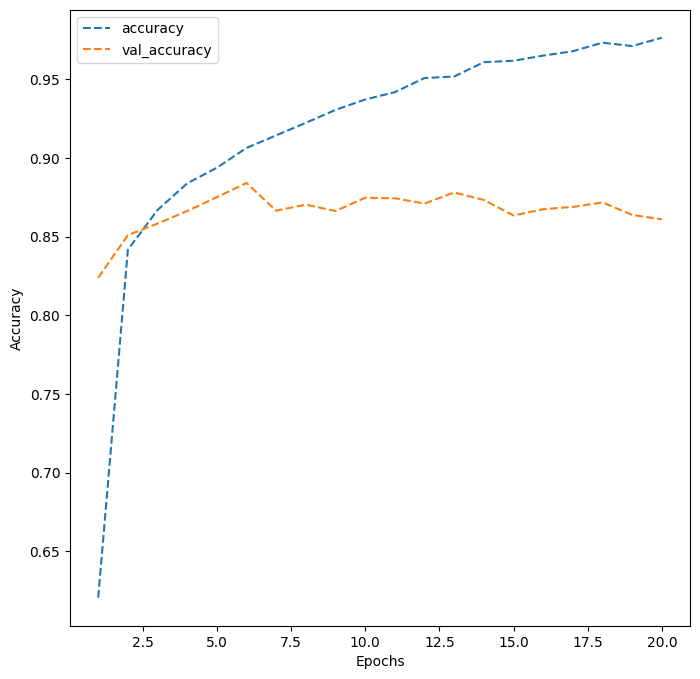

In [ ]:
# plot training and validation accuracies
dict_hist_3 = history_cnn_model_1.history     # create dictionary of values from modelhistory
epoch_list_3 = [i for i in range (1,21)]      # create list of epochs 1-20

# create plot
plt.figure(figsize = (8, 8))    # define figure size
plt.plot(epoch_list_3, dict_hist_3['accuracy'], ls = '--', label = 'accuracy')    # same syntax as previous plots, update feature and label parameters
plt.plot(epoch_list_3, dict_hist_3['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

###**CNN Model 2 - Sequential class, 17 layers**

####**Clear backend and set seed**

In [ ]:
# clear backend to free up resources/memory for next model
backend.clear_session()

# fix seed
tf.random.set_seed(12)

####**Model Architecture**

Define CNN model function with **Sequential class** using the following architecture:
 - First Convolutional layer with **16 filters** and the kernel size of **3x3**. Use the **'same'** padding and provide the **input shape = (32, 32, 1)**
 - LeakyReLU layer with the slope equal to **0.1**
 - Second Convolutional layer with **32 filters** and the kernel size of **3x3** with **'same'** padding
 - LeakyReLU with the slope equal to **0.1**
 - MaxPooling layer with a pool size of **2x2**
 - **BatchNormalization** layer
 - Third Convolutional layer with **32 filters** and the kernel size of **3x3** with **'same'** padding
 - LeakyReLU layer with the slope equal to **0.1**
 - Fourth Convolutional layer **64 filters** and the kernel size of **3x3** with **'same'** padding
 - LeakyReLU layer with the slope equal to **0.1**
 - MaxPooling layer with a pool size of **2x2**
 - **BatchNormalization** layer
 - **Flatten** the output from the previous layer
 - Dense layer with **32 nodes**
 - LeakyReLU layer with the slope equal to **0.1**
 - Dropout layer with the rate equal to **0.5**
 - Output layer with **softmax activation** and **10 nodes**

 <br>

Compile the model using:
* loss funcation as **categorical_crossentropy**
* optimizer as **Adam(learning_rate = 0.001)**
* metric equal to **'accuracy'**

<br>

Fit the model on training data using:
* validation split of **0.2**
* batch size = **128**
* verbose = **1**
* epochs = **30**

#### **Build and train CNN Model 2**

In [ ]:
# Step 1: Define model function with given architecture
def cnn_model_2():
    model = Sequential()

    # add model layers
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1)))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())       # add new BatchNorm layer to improve model stability
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))   # add third convolutional layer
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))   # add fourth convolutional layer
    model.add(LeakyReLU(alpha = 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(Dropout(rate = 0.5))      # replace 50% of output with zero
    model.add(Dense(10, activation = 'softmax'))

    # compile model
    model.compile(optimizer = Adam(learning_rate = 0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
# Step 2: Build the model
cnn_model_2 = cnn_model_2()

In [ ]:
# Step 3: Print model summary
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Step 4: Fit the model
history_cnn_model_2 = cnn_model_2.fit(x = X_train,
                                      y = y_train,
                                      batch_size = 128,
                                      epochs = 30,
                                      verbose = 1,
                                      validation_split = 0.2)

Epoch 1/30
263/263 [==============================] - 135s 505ms/step - loss: 1.3409 - accuracy: 0.5479 - val_loss: 1.8106 - val_accuracy: 0.3340
Epoch 2/30
263/263 [==============================] - 120s 455ms/step - loss: 0.6541 - accuracy: 0.7977 - val_loss: 0.4865 - val_accuracy: 0.8629
Epoch 3/30
263/263 [==============================] - 127s 482ms/step - loss: 0.5458 - accuracy: 0.8340 - val_loss: 0.4259 - val_accuracy: 0.8798
Epoch 4/30
263/263 [==============================] - 124s 471ms/step - loss: 0.4841 - accuracy: 0.8514 - val_loss: 0.4025 - val_accuracy: 0.8868
Epoch 5/30
263/263 [==============================] - 127s 482ms/step - loss: 0.4457 - accuracy: 0.8644 - val_loss: 0.3823 - val_accuracy: 0.8952
Epoch 6/30
263/263 [==============================] - 128s 486ms/step - loss: 0.4033 - accuracy: 0.8766 - val_loss: 0.3928 - val_accuracy: 0.8935
Epoch 7/30
263/263 [==============================] - 128s 485ms/step - loss: 0.3704 - accuracy: 0.8848 - val_loss: 0.3712 -

#### **Plot accuracy metrics**

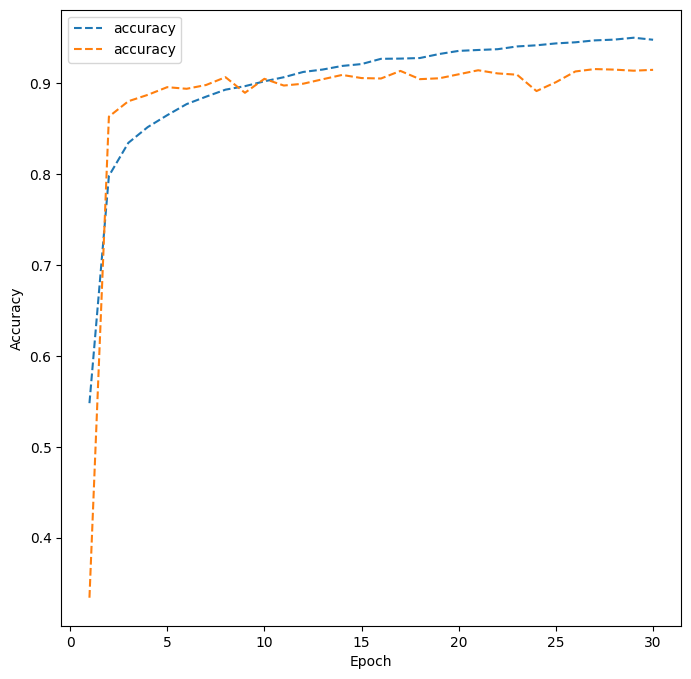

In [ ]:
# plot training and validation accuracies
dict_hist_4 = history_cnn_model_2.history
epoch_list_4 = [i for i in range(1, 31)]

# create plot
plt.figure(figsize = (8, 8))
plt.plot(epoch_list_4, dict_hist_4['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list_4, dict_hist_4['val_accuracy'], ls = '--', label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###**Observations:**
* The accuracy of CNN Model 1 is **~98% for training data**, but the **validation accuracy is ~86%**.  The plateau observed in the accuracy plot suggests that CNN Model 1 has overfit the training data.
* **CNN Model 1 exhibits specialized performance** to the training data set, CNN Model 2 is designed to have improved generalized performance to prevent overfitting.
* CNN Model 2 has a validation accuracy that is lower than the training accuracy (91% vs 94%), and validation accuracy is still observed to plateau, suggesting that **overfitting still occurs in CNN Model 2**.
* Compared with CNN MOdel 1 performance, CNN Model 2 is observed to have **increased stability** and is **less likely to experience bias from overfitting**.

### **CNN Model 2 - Predictions on Test Dataset**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

#### **Generate test data predictions**

In [ ]:
# make predictions on test dataset using previously trained cnn_model_2
test_pred = cnn_model_2.predict(X_test)   # generate np.array of prediction values using 'X_test' as input data into the model

# use 'np.argmax()' function to return array of indicies associated with the maximum value in the original test_pred array
# this converts the one-hot encoded vector prediction into classification category 0-9
test_pred = np.argmax(test_pred,      # define data array
                      axis = -1)

563/563 [==============================] - 20s 35ms/step


In [ ]:
# convert each data value in 'y_test' values from one-hot encoded vector to single label for classification report and confusion matrix
y_test = np.argmax(y_test, axis = -1)

#### **Print classification report and confusion matrix**

In [ ]:
# use previously imported functions to create classification report and confusion matrix

# create classification report
cr_2 = classification_report(y_test, test_pred)
print(cr_2)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1814
           1       0.91      0.91      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.87      0.89      0.88      1719
           4       0.91      0.93      0.92      1812
           5       0.87      0.93      0.90      1768
           6       0.93      0.90      0.91      1832
           7       0.89      0.94      0.92      1808
           8       0.93      0.90      0.91      1812
           9       0.94      0.88      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



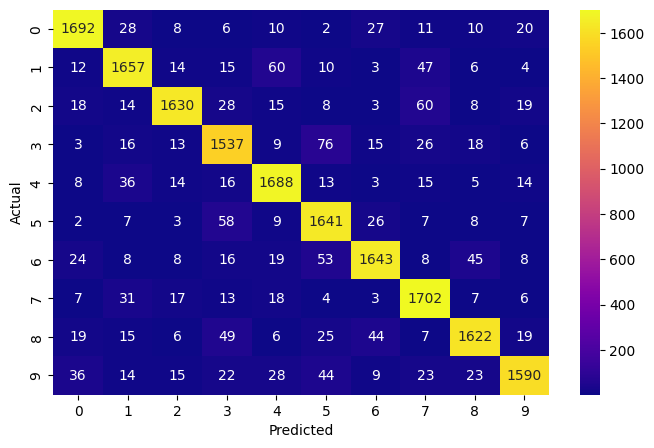

In [ ]:
# create confusion matrix
cm_2 = confusion_matrix(y_test, test_pred)

# plot confusion matrix via heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(cm_2,               # define data input
            annot = True,       # add number labels to heatmap
            fmt = '.0f',        # format labels to float type with zero decimals
            cmap = 'plasma')    # formal heatmap color scheme

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###**Final Observations:**

**Classification Report**
* The accuracy and sensitivity of CNN Model 2 is significantly higher compared to CNN Model 1 and both ANN Models.
* The lowest precision score was for numbers 3 and 5 at ~87% and the lowest recall was for number 9 at 88%.  These number are much higher than the precision and recall observed in the ANN model.
* The **F1-score for CNN Model 2 is 91%**, almost 15% higher than ANN Model 2.

<br>

**Confusion Matrix**
* The two **most commonly mispredicted numbers** in CNN Model 2 were still **5 and 3**, but the total number of mispredictions was 76, much lower than the 224 mispredictions from the ANN Model 2.
